#### LIBRERIAS

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import calendar
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

#### IMPORTACIÓN DEL DATASET

In [44]:
mp_donantes = pd.read_csv("./data/datos_donantes.csv")
mp_donantes.head()

,name,email,date,is_partner,company,role_company,donation_frecuency,suscription_status,donation_type,amount,method_pay,donation_date
0,Tara Young,tara.young@gmail.com,2017-10-22,1,Nike,CTO,1,1,4,0.00,1,2021-11-14
1,Bobby Acevedo,bobby.acevedo@gmail.com,2019-02-18,0,NaN,NaN,0,0,1,1355.38,3,2022-05-01
2,James Payne,james.payne@gmail.com,2013-03-06,0,NaN,NaN,0,0,1,8132.27,3,2014-10-18
3,Heather Mooney,heather.mooney@gmail.com,2013-06-02,1,Jonhsons,Employee,0,1,2,0.00,2,2018-06-11
4,Joseph Anderson,joseph.anderson@gmail.com,2024-01-21,1,The Oberoi,Employee,1,1,2,0.00,2,2024-01-30


#### INFORMACIÓN PRELIMINAR

In [3]:
mp_donantes.shape

(3934, 12)

In [5]:
mp_donantes.tail()

,name,email,date,is_partner,company,role_company,donation_frecuency,suscription_status,donation_type,amount,method_pay,donation_date
3929,Thomas Edwards,thomas.edwards@gmail.com,2021-06-06,0,NaN,NaN,1,1,1,3162.55,1,2022-09-06
3930,Thomas Edwards,thomas.edwards@gmail.com,2021-06-06,0,NaN,NaN,1,1,1,3162.55,1,2022-10-06
3931,Thomas Edwards,thomas.edwards@gmail.com,2021-06-06,0,NaN,NaN,1,1,1,3162.55,1,2022-11-06
3932,Thomas Edwards,thomas.edwards@gmail.com,2021-06-06,0,NaN,NaN,1,1,1,3162.55,1,2022-12-06
3933,Thomas Edwards,thomas.edwards@gmail.com,2021-06-06,0,NaN,NaN,1,1,1,3162.55,1,2023-01-06


In [6]:
mp_donantes.sample(5)

,name,email,date,is_partner,company,role_company,donation_frecuency,suscription_status,donation_type,amount,method_pay,donation_date
1944,Kristen Garcia,kristen.garcia@gmail.com,2023-11-23,0,NaN,NaN,1,1,1,6325.10,2,2024-09-23
2967,Jeffery Villegas,jeffery.villegas@gmail.com,2011-09-26,0,NaN,NaN,1,1,1,1807.17,3,2012-12-26
3330,Heather Martinez,heather.martinez@gmail.com,2009-11-01,0,NaN,NaN,1,1,1,4517.93,1,2010-01-01
3460,David Thomas DDS,david thomas dds.@gmail.com,2009-09-01,0,NaN,NaN,1,1,1,1807.17,2,2009-09-01
3540,Taylor Beard,taylor.beard@gmail.com,2018-07-07,0,NaN,NaN,1,1,1,90.36,2,2018-10-07


In [30]:
mp_donantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                3934 non-null   object 
 1   email               3934 non-null   object 
 2   date                3934 non-null   object 
 3   is_partner          3934 non-null   int64  
 4   company             497 non-null    object 
 5   role_company        497 non-null    object 
 6   donation_frecuency  3934 non-null   int64  
 7   suscription_status  3934 non-null   int64  
 8   donation_type       3934 non-null   int64  
 9   amount              3934 non-null   float64
 10  method_pay          3934 non-null   int64  
 11  donation_date       3934 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 368.9+ KB


In [31]:
mp_donantes.describe(include='all')

,name,email,date,is_partner,company,role_company,donation_frecuency,suscription_status,donation_type,amount,method_pay,donation_date
count,3934,3934,3934,3934.000000,497,497,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934
unique,994,994,496,NaN,16,3,NaN,NaN,NaN,NaN,NaN,2995
top,Christy Johnson,christy.johnson@gmail.com,2023-10-29,NaN,The Oberoi,Employee,NaN,NaN,NaN,NaN,NaN,2024-02-14
freq,24,24,39,NaN,39,175,NaN,NaN,NaN,NaN,NaN,6
mean,NaN,NaN,NaN,0.126335,NaN,NaN,0.873157,0.936197,1.174631,3005.890974,1.918149,NaN
std,NaN,NaN,NaN,0.332268,NaN,NaN,0.332839,0.244432,0.604885,2954.647326,0.809875,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000,1.000000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,1.000000,1.000000,451.790000,1.000000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,1.000000,1.000000,1807.170000,2.000000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,1.000000,1.000000,4517.930000,3.000000,NaN


Algunas deducciones que se pueden hacer en base al describe() de los datos:  

- Todas las variables, excepto 'company' y 'role_company' tienen 3934 observaciones que es la cantidad total de filas del dataset. 

- 'Company' y 'role_company' tienen 497 observaciones, que es apenas un 12.67% del total, el resto son donaciones de particulares.  

- 'Christy Johnson' es quien mas donaciones realizó.

- '2023-10-29' es la fecha en la que se registraron mayor cantidad de donantes.

- 'The Oberoi' es la empresa más frecuente.

- '2024-02-14' fue el día que mayor cantidad de donaciones se recibieron.

- En cuanto a la variable 'donation_frecuency' se puede ver que la mediana (50%) es de 1, lo que indice que la mayoría de las observaciones tienen una frecuencia de donación mensual.

- La desviación estándar de 'amount' (target del modelo) es alta, lo que indica una gran variabilidad en los montos de donación.

In [9]:
# DataFrame numérico
mp_donantes_numerico = mp_donantes.drop(['name','email','date', 'company', 'role_company', 'donation_date'], axis=1)
mp_donantes_numerico

,is_partner,donation_frecuency,suscription_status,donation_type,amount,method_pay
0,1,1,1,4,0.00,1
1,0,0,0,1,1355.38,3
2,0,0,0,1,8132.27,3
3,1,0,1,2,0.00,2
4,1,1,1,2,0.00,2
...,...,...,...,...,...,...
3929,0,1,1,1,3162.55,1
3930,0,1,1,1,3162.55,1
3931,0,1,1,1,3162.55,1
3932,0,1,1,1,3162.55,1


In [10]:
# Análisis de la cardinalidad

for i in mp_donantes.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {(mp_donantes[i].nunique()/mp_donantes.shape[0])*100:.2f}%")

La cardinalidad de la variable name es 25.27%
La cardinalidad de la variable email es 25.27%
La cardinalidad de la variable date es 12.61%
La cardinalidad de la variable company es 0.41%
La cardinalidad de la variable role_company es 0.08%
La cardinalidad de la variable donation_date es 76.13%


Las columnas 'name' y 'email' tienen una alta cardinalidad, alrededor del 25.27%. Esto sugiere que hay una gran variedad de nombres y direcciones de correo electrónico únicos en el conjunto de datos.

#### LIMPIEZA DEL DATAFRAME

In [45]:
mp_donantes.duplicated().sum()

0

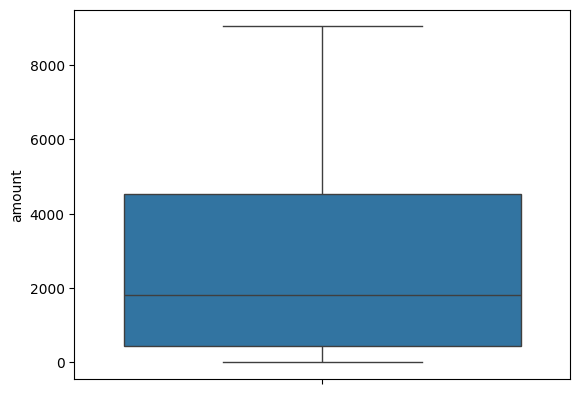

In [46]:
sns.boxplot(mp_donantes['amount']);

In [47]:
# Se efectúa una sustitución de los valores NaN por "particular" en las variables 'company' y 'role_company' que son missing porque el donante no es empresa.
mp_donantes.fillna({'company': 'Particular', 'role_company': 'Particular'}, inplace=True)

In [48]:
mp_donantes['date'] = pd.to_datetime(mp_donantes['date'])
mp_donantes['donation_date'] = pd.to_datetime(mp_donantes['donation_date'])

In [49]:
def modificar_method_pay(row):
    if row['donation_type'] in [2, 3, 4]:
        return 0
    else:
        return row['method_pay']

# Aplicar la función a la columna 'method_pay'
mp_donantes['method_pay'] = mp_donantes.apply(modificar_method_pay, axis=1)

In [57]:
# def convert_to_rupias(amount):
#     return amount * 85  # Suponiendo que 1 euro equivale a 85 rupias

# # Aplicar la conversión solo cuando is_partner es igual a 1
# mp_donantes['amount'] = mp_donantes.apply(lambda row: convert_to_rupias(row['amount']) if row['is_partner'] == 1 else row['amount'], axis=1)

In [50]:
mp_donantes['month'] = mp_donantes['donation_date'].dt.month
mp_donantes['year'] = mp_donantes['donation_date'].dt.year
mp_donantes['day'] = mp_donantes['donation_date'].dt.day

mp_donantes = mp_donantes.drop(mp_donantes[mp_donantes['donation_date'] >= '2024-04-01'].index)

In [51]:
mp_donantes.query('donation_date >= "2024-04-01"')

,name,email,date,is_partner,company,role_company,donation_frecuency,suscription_status,donation_type,amount,method_pay,donation_date,month,year,day


In [52]:
mp_donantes.head(2)

,name,email,date,is_partner,company,role_company,donation_frecuency,suscription_status,donation_type,amount,method_pay,donation_date,month,year,day
0,Tara Young,tara.young@gmail.com,2017-10-22,1,Nike,CTO,1,1,4,0.00,0,2021-11-14,11,2021,14
1,Bobby Acevedo,bobby.acevedo@gmail.com,2019-02-18,0,Particular,Particular,0,0,1,1355.38,3,2022-05-01,5,2022,1


### Análisis exploratorio

#### VISUALIZACIÓN. ANÁLISIS UNIVARIANTE Y BIVARIANTE.

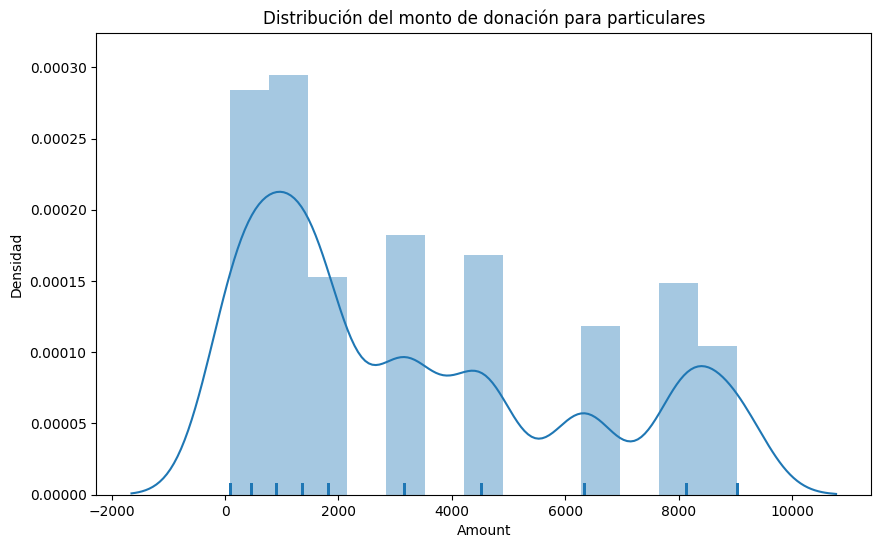

In [53]:
particular_df = mp_donantes[mp_donantes['is_partner'] == 0]

plt.figure(figsize=(10, 6))
sns.distplot(particular_df['amount'], rug=True)

plt.xlabel('Amount')
plt.ylabel('Densidad')
plt.title('Distribución del monto de donación para particulares')

plt.show()

Como se puede apreciar el monto de las donaciones de particulares gira mayormente entre ₹1000 y ₹1500. 

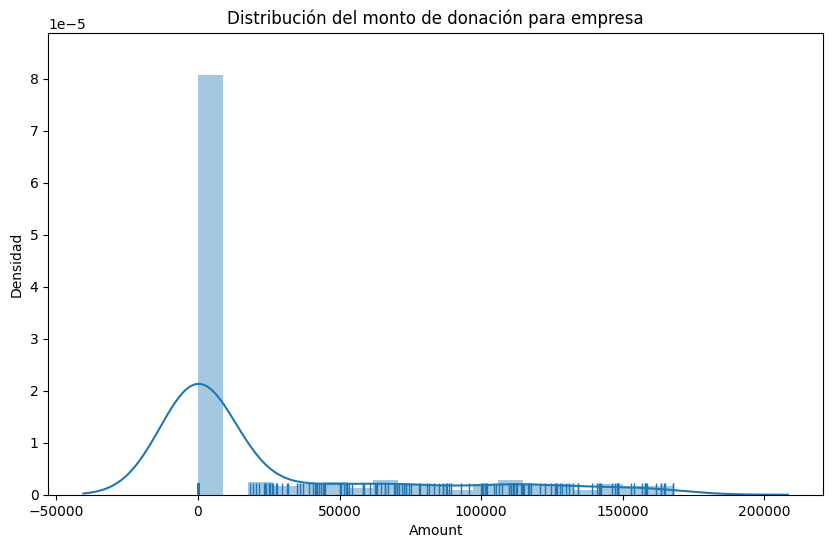

In [58]:
empresa_df = mp_donantes[mp_donantes['is_partner'] == 1]

plt.figure(figsize=(10, 6))
sns.distplot(empresa_df['amount'], rug=True)

plt.xlabel('Amount')
plt.ylabel('Densidad')
plt.title('Distribución del monto de donación para empresa')

plt.show()

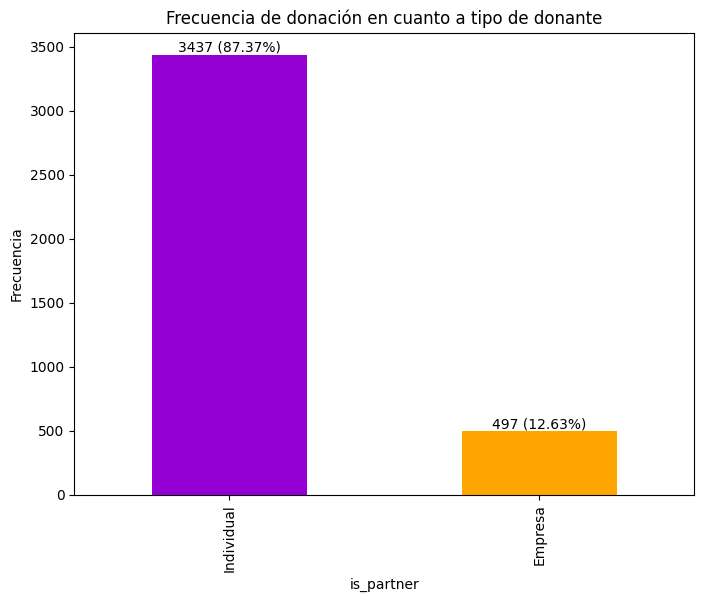

In [59]:
partner_counts = mp_donantes_numerico['is_partner'].value_counts()

total_donantes = partner_counts.sum()
percentages = (partner_counts / total_donantes) * 100

plt.figure(figsize=(8, 6))
bars = partner_counts.plot(kind='bar', color=['darkviolet', 'orange'])

plt.title('Frecuencia de donación en cuanto a tipo de donante')
plt.xlabel('is_partner')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['Individual', 'Empresa'])

for i, count in enumerate(partner_counts):
    plt.text(i, count + 1, f'{count} ({percentages[i]:.2f}%)', ha='center', va='bottom')

plt.show()

Como se vió anteriormente en los datos estadísticos, la mayor cantidad de donaciones son efectuadas por individuos. Vale aclarar que, los **individuos solo realizan donaciones en efectivo**, mientras que las **empresas tienen cuatro tipos de donaciones**.


Si nos centramos únicamente en donaciones en efectivo se ve en el siguiente gráfico que la proporción es aún mayor.

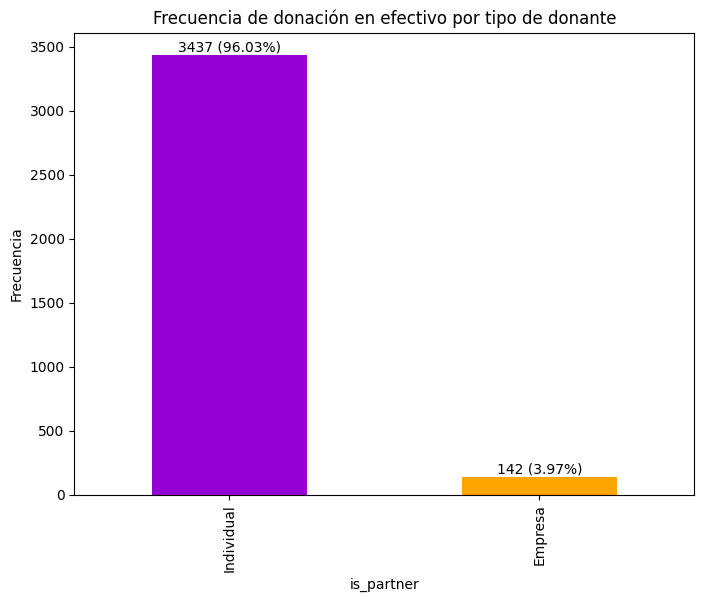

In [60]:
efectivo_donantes = mp_donantes_numerico[mp_donantes_numerico['donation_type'] == 1]

efectivo_partner_counts = efectivo_donantes['is_partner'].value_counts()

total_efectivo_donantes = efectivo_partner_counts.sum()

efectivo_percentages = (efectivo_partner_counts / total_efectivo_donantes) * 100

plt.figure(figsize=(8, 6))
bars = efectivo_partner_counts.plot(kind='bar', color=['darkviolet', 'orange'])

plt.title('Frecuencia de donación en efectivo por tipo de donante')
plt.xlabel('is_partner')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['Individual', 'Empresa'])

for i, count in enumerate(efectivo_partner_counts):
    plt.text(i, count + 1, f'{count} ({efectivo_percentages[i]:.2f}%)', ha='center', va='bottom')

plt.show()

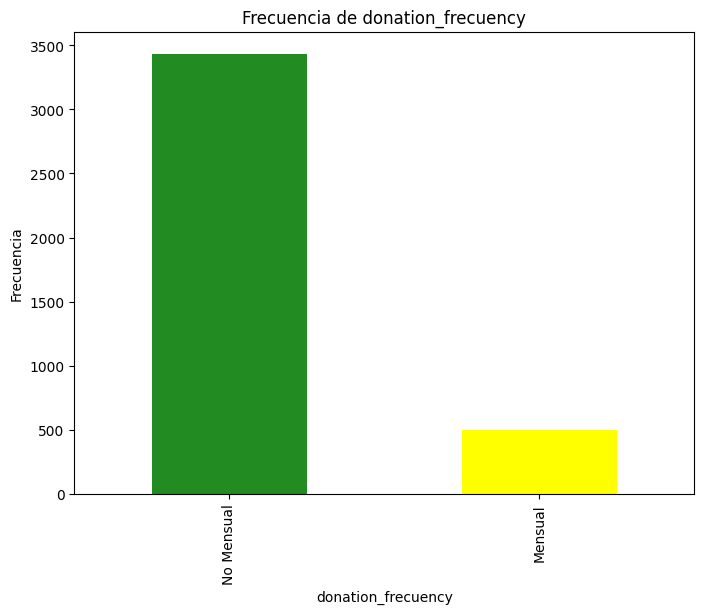

In [61]:
frecuency_counts = mp_donantes_numerico['donation_frecuency'].value_counts()

plt.figure(figsize=(8, 6))
frecuency_counts.plot(kind='bar', color=['forestgreen', 'yellow'])
plt.title('Frecuencia de donation_frecuency')
plt.xlabel('donation_frecuency')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['No Mensual', 'Mensual'])
plt.show()

La mayoría de los donantes no realizan donaciones mensuales, esto puede ser un parámetro a la hora de evaluar **el nivel de compromiso** del donante para con la organización.

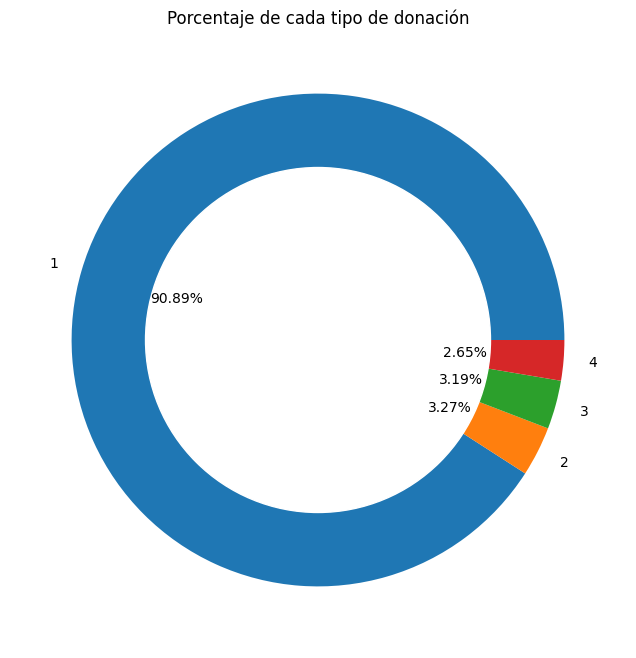

In [62]:
type_counts = mp_donantes['donation_type'].value_counts()

type_percentages = (type_counts / type_counts.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.2f%%')

circle = plt.Circle((0, 0), 0.7, color='white')
plt.gca().add_artist(circle)

plt.title('Porcentaje de cada tipo de donación')
plt.show()

- El tipo de donación "1" que corresponde a dinero es la que prima dobre el resto con aproximadamente un 91%.

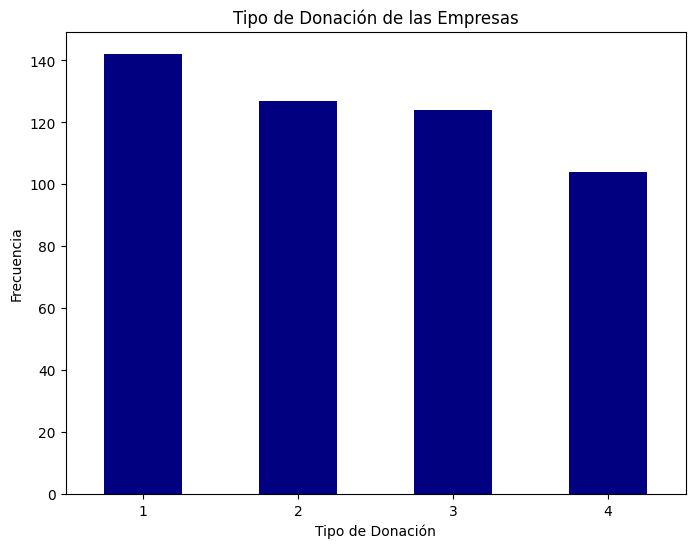

In [64]:
df_empresas = mp_donantes_numerico[mp_donantes_numerico['is_partner'] == 1]

frecuencia_donacion = df_empresas['donation_type'].value_counts()

plt.figure(figsize=(8, 6))
frecuencia_donacion.plot(kind='bar', color='navy')
plt.title('Tipo de Donación de las Empresas')
plt.xlabel('Tipo de Donación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

En el caso puntualmente de las empresas (donde a diferencia de los particulares tienen cuatro formas de donar y no sólo efectivo) el tipo de donación esta un poco mas equilibrado, pero igualmente **se aprecia que sigue siendo dinero la forma que más eligen para efectuar la donación.**

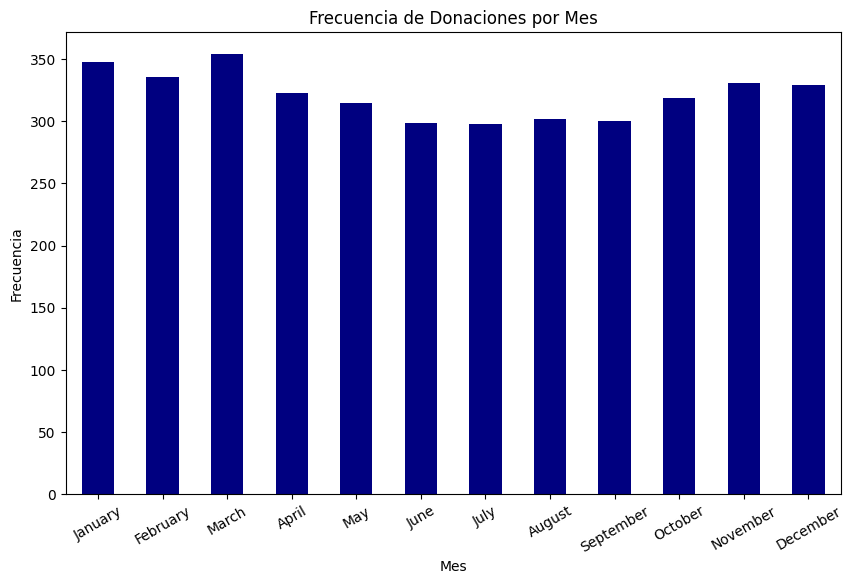

In [66]:
frecuencia_mes = mp_donantes['month'].value_counts().sort_index()

meses = [calendar.month_name[i] for i in range(1, 13)]

plt.figure(figsize=(10, 6))
frecuencia_mes.plot(kind='bar', color='navy')
plt.title('Frecuencia de Donaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(range(12), meses, rotation=30)
plt.show()


No existe una gran disparidad en cuanto a la época del año en la que se recibe mayor cantidad de donaciones, **pero a priori se observa una leve mayoría tanto en los primeros como en los últimos meses del año.**

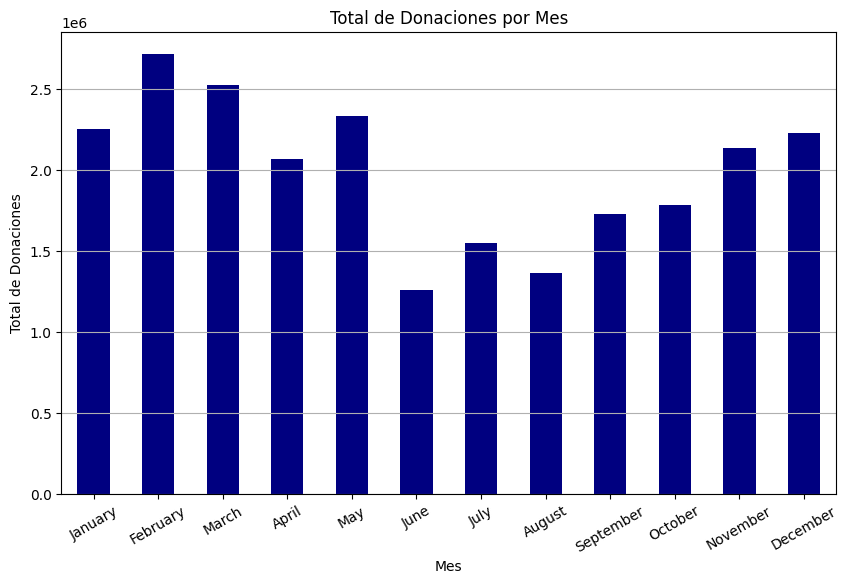

month,1,2,3,4,5,6,7,8,9,10,11,12
amount,2256477.88,2716967.47,2528884.75,2071737.76,2334014.37,1261347.86,1550147.97,1368961.44,1731855.11,1785560.45,2136851.54,2227634.5


In [72]:
total_donations_monthly = mp_donantes.groupby('month')['amount'].sum()

total_donations_monthly.plot(kind='bar', figsize=(10, 6), color='navy')
plt.title('Total de Donaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Donaciones')
plt.grid(axis='y')
plt.xticks(range(12), meses, rotation=30)
plt.show()

mp_donantes.groupby('month')[['amount']].sum().T

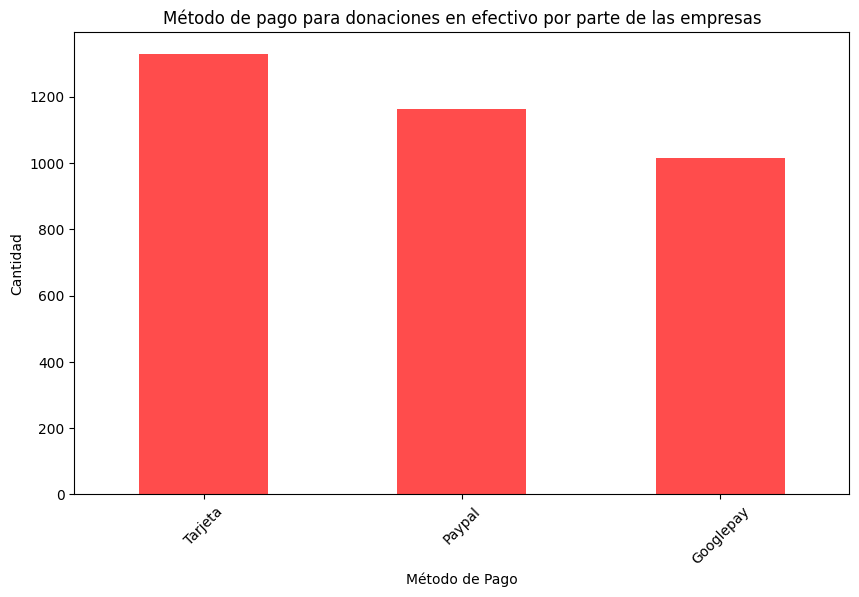

In [74]:
# Filtrado del DataFrame para incluir solo las donaciones en efectivo realizadas por empresas
empresas_efectivo_df = mp_donantes[(mp_donantes['donation_type'] == 1)]
metodo_pago_nombres = {1: 'Tarjeta', 2: 'Paypal', 3: 'Googlepay'}
empresas_efectivo_df['method_pay'] = empresas_efectivo_df['method_pay'].replace(metodo_pago_nombres)

# Calculo de la frecuencia de cada método de pago utilizado por las empresas para las donaciones en efectivo
metodo_pago_counts = empresas_efectivo_df['method_pay'].value_counts()

plt.figure(figsize=(10, 6))
metodo_pago_counts.plot(kind='bar', color='red', alpha=0.7)

plt.title('Método de pago para donaciones en efectivo por parte de las empresas')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

plt.show()

<Figure size 2000x600 with 0 Axes>

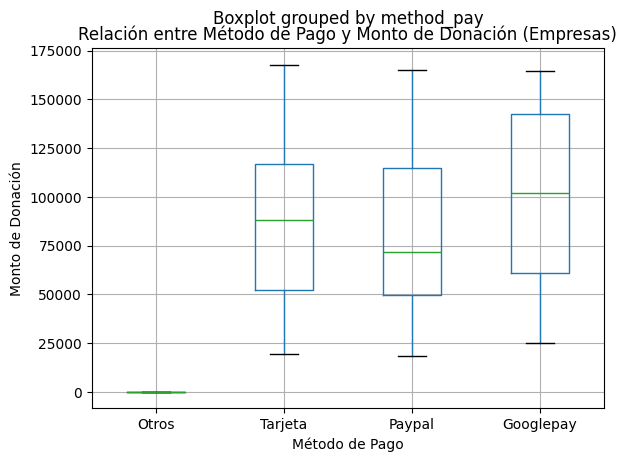

In [80]:
mp_empresas = mp_donantes[mp_donantes['is_partner'] == 1]

plt.figure(figsize=(10, 6))
mp_empresas.boxplot(column='amount', by='method_pay')

plt.title('Relación entre Método de Pago y Monto de Donación (Empresas)')
plt.xlabel('Método de Pago')
plt.ylabel('Monto de Donación')
plt.xticks([1, 2, 3, 4], ['Otros', 'Tarjeta', 'Paypal', 'Googlepay'])
plt.show();

- Cuando la donación es en efectivo, las empresas eligen pagar con tarjeta. Cuando el monto de la donación asciende, el método de pago mayormente elegido por las empresas, ya sea por conveniencia, incentivos, disponibilidad de fondos, o el motivo que fuese, es Googlepay.

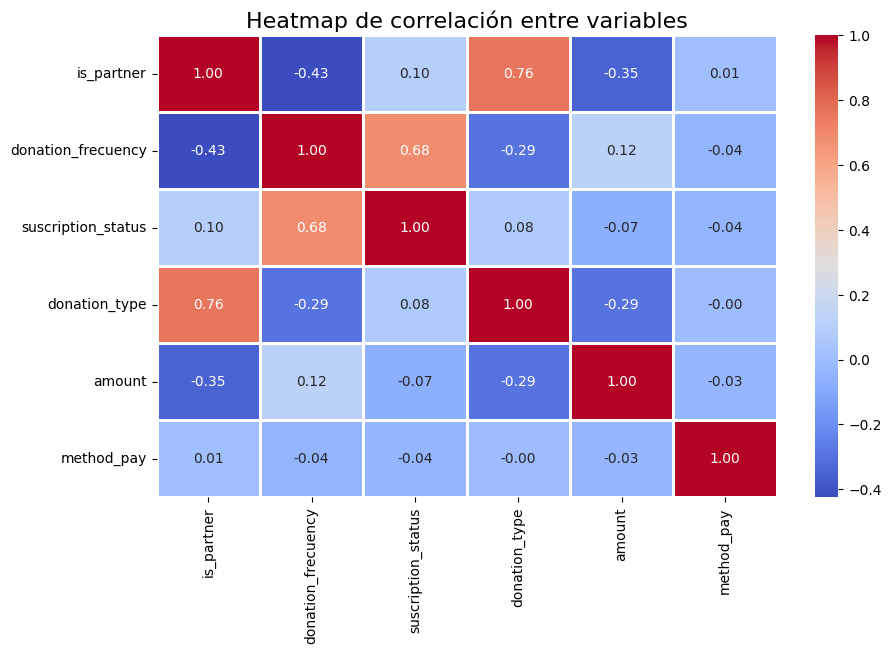

In [81]:
plt.figure(figsize=(10, 6))
sns.heatmap(mp_donantes_numerico.corr(),  linewidths=2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de correlación entre variables', fontsize=16)
plt.show()

In [82]:
X = mp_donantes_numerico.drop(columns=['amount'])

# Calculo del VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

             Variable        VIF
0          is_partner   3.523197
1  donation_frecuency  27.816841
2  suscription_status  36.206973
3       donation_type   8.704218
4          method_pay   5.119585


Las variables 'donation_frequency y 'suscription_status' parecen estar muy correlacionadas, lo cual sugiere realizar técnica de regularización previo.